In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [9]:
#pobieranie danych
data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

In [10]:
#podział na zbiory: uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#model regresji
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [13]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [15]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestRegressor ? Documentation for RandomForestRegressor i Fitted RandomForestRegressor(random_state=42)

In [16]:
#prognozowanie
y_pred = model.predict(X_test)

In [17]:
#ocena jakości
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [18]:
print(f"błąd mse: {mse}")
print(f"R^2:{r2}")

błąd mse: 0.2553684927247781
R^2:0.8051230593157366


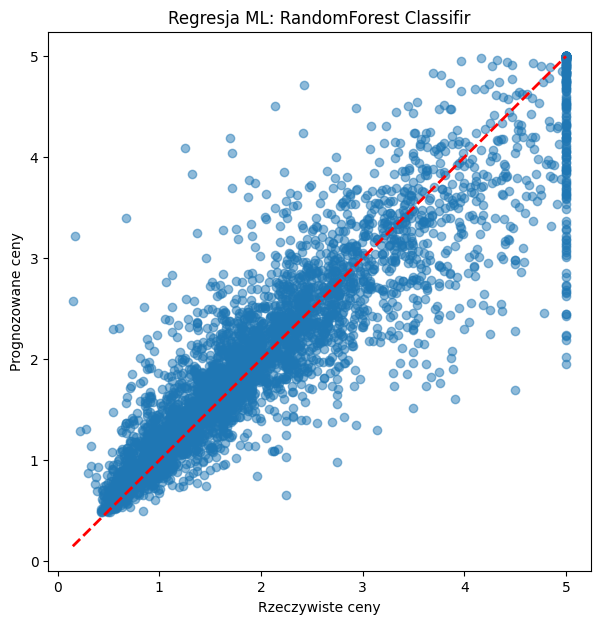

In [20]:
#wykres
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Rzeczywiste ceny")
plt.ylabel("Prognozowane ceny")
plt.title("Regresja ML: RandomForest Classifir")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.show()

In [22]:
#wpływ cech
importances = model.feature_importances_
feat_imp = pd.Series(importances,index=X.columns).sort_values(ascending=False)
print(f"najważniejsze cechy wpływające na cenę:\n{feat_imp}")

najważniejsze cechy wpływające na cenę:
MedInc        0.524871
AveOccup      0.138443
Latitude      0.088936
Longitude     0.088629
HouseAge      0.054593
AveRooms      0.044272
Population    0.030650
AveBedrms     0.029606
dtype: float64
